In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


## Reading in the nessesary Libraries

In [93]:
import seaborn as sns
from matplotlib import pyplot as plt

In [94]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


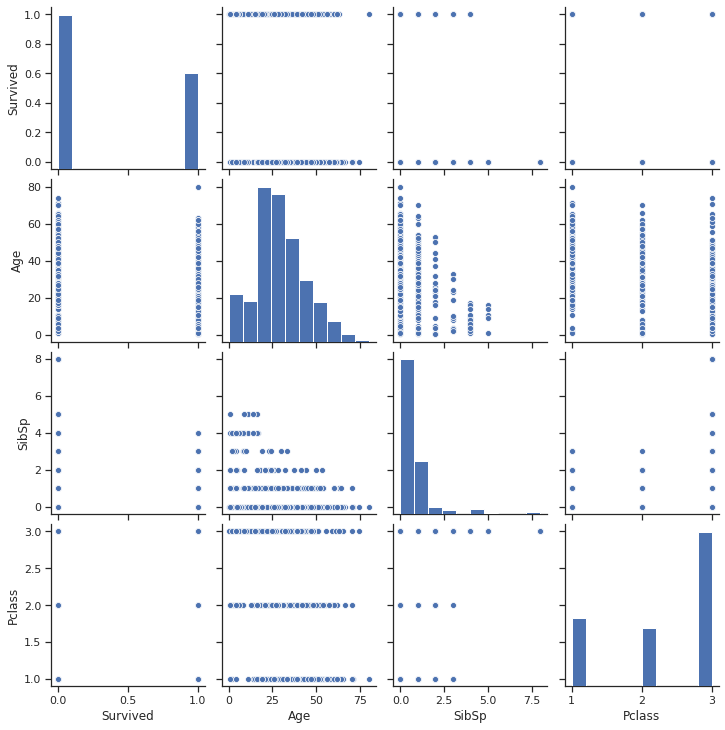

In [95]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[['Survived','Age','SibSp','Pclass']])
plt.show()

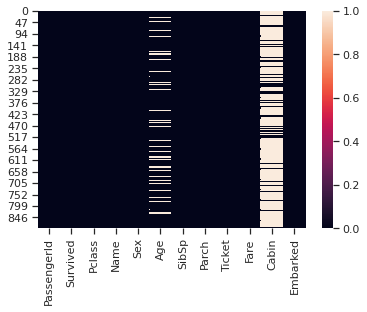

In [96]:
#checking for null values 
sns.heatmap(df.isnull())

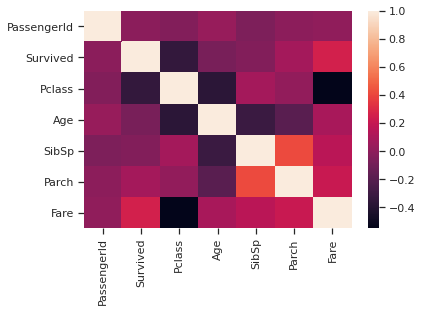

In [97]:
#correlation heatmap
sns.heatmap(df.corr())

In [98]:
df=df.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1)


## Some Visualisations

In [99]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


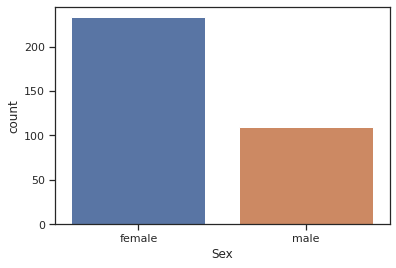

In [100]:
#The Gender Gap Betwwen the people who survived
df_survived=df[df['Survived']==1]
sns.countplot(df_survived['Sex'])

### Encoding the Sex Values to binary

In [101]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='error',drop='first')
# passing the gender column 
enc_df = pd.DataFrame(enc.fit_transform(df[['Sex']]).toarray())
# merge with main df bridge_df on key values
df =df.join(enc_df)


In [102]:
df['Male']=df[0]
df=df.drop(['Sex',0],axis=1)

## <u>Gender and survivorship plot</u>

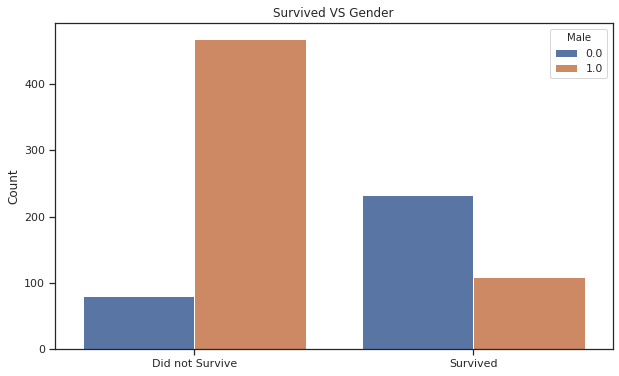

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(df.Survived,hue=df.Male)
plt.xticks(ticks=[0,1],labels=['Did not Survive','Survived'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Survived VS Gender')

plt.show()

### From the above plot it is clear that the males dies disproportionately more than the females who were aboard the HMS-Titanic 

## <u>Class and survivorship plot</u>

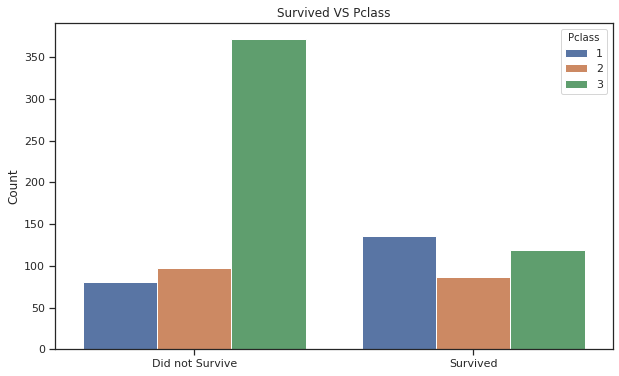

In [104]:
plt.figure(figsize=(10,6))
sns.countplot(df.Survived,hue=df.Pclass)
plt.xticks(ticks=[0,1],labels=['Did not Survive','Survived'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Survived VS Pclass')
plt.show()

### This shows us the fact that the people who formed the third class of passengers on this ship died dispropotionately more than the first and second classes 

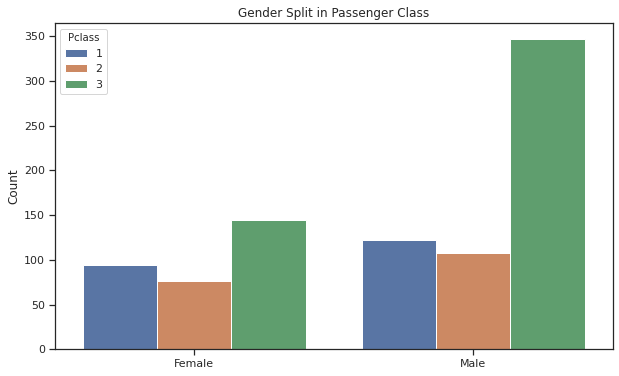

In [105]:
plt.figure(figsize=(10,6))
sns.countplot(df.Male,hue=df.Pclass)
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.xlabel('')
plt.ylabel('Count')
plt.title('Gender Split in Passenger Class')
plt.show()

In [106]:
df.fillna(df.Age.median(),inplace=True)

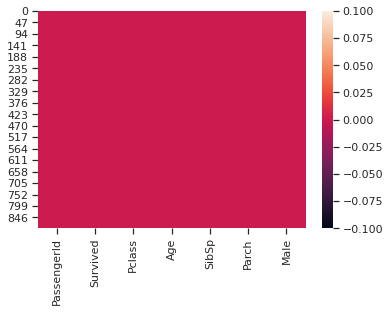

In [107]:
sns.heatmap(df.isnull())

In [108]:
from sklearn.tree import DecisionTreeClassifier
#from adspy_shared_utilities import plot_decision_tree
#from adspy_shared_utilities import plot_feature_importances

clf = DecisionTreeClassifier()

In [109]:
df.set_index(['PassengerId'],inplace=True)

In [110]:
x=df[['Pclass','Male','Age','SibSp','Parch']]
y=df['Survived']
#spliting the data to the train test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,train_size=0.75)

In [111]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Male
PassengerId,,,,,,
1,0,3,22.0,1,0,1.0
2,1,1,38.0,1,0,0.0
3,1,3,26.0,0,0,0.0
4,1,1,35.0,1,0,0.0
5,0,3,35.0,0,0,1.0


In [112]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [3,4,5], 'min_samples_leaf': [5,8,10,12]}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,y_train)
accuracy = grid_search.best_score_
best_param =grid_search.best_params_

In [113]:
print(best_param)
print(accuracy)

{'max_depth': 4, 'min_samples_leaf': 5}
0.8413161465400272


In [114]:
clf_main= DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
clf_main.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [115]:
predict=clf_main.predict(X_test)

In [116]:
#Accuracy Score
clf_main.score(X_test,y_test)

0.7668161434977578

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict, target_names=[' Dead','Survived']))

              precision    recall  f1-score   support

        Dead       0.80      0.80      0.80       128
    Survived       0.73      0.73      0.73        95

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



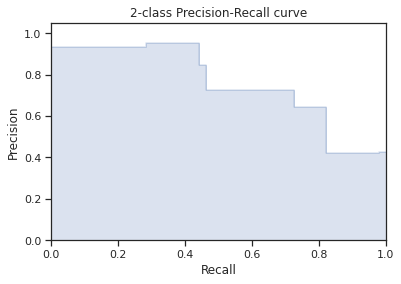

In [118]:
y_score=clf_main.predict_proba(X_test)[:,-1]
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

In [119]:
df_test=pd.read_csv('../input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
df_test=df_test.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1)
# passing the gender column 
enc_df_test = pd.DataFrame(enc.fit_transform(df_test[['Sex']]).toarray())
# merge with main df bridge_df on key values
df_test =df_test.join(enc_df_test)


In [121]:
df_test['Male']=df_test[0]
df_test=df_test.drop(['Sex',0],axis=1)

In [122]:
df_test.fillna(df_test.Age.median(),inplace=True)

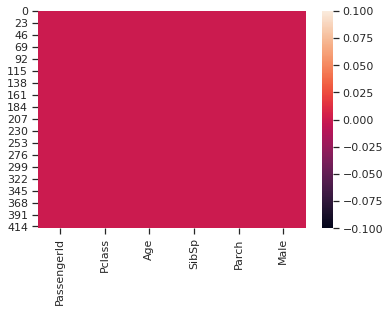

In [123]:
sns.heatmap(df_test.isnull())

In [124]:
df_test.set_index(['PassengerId'],inplace=True)

In [125]:
test_predict=clf_main.predict(df_test)

In [126]:
test_predict=pd.Series(test_predict)

In [127]:
df_test.reset_index(inplace=True)

In [128]:
df_predict=df_test['PassengerId']

In [129]:
df_predict= pd.concat([df_predict,test_predict], axis=1)


In [130]:
df_predict.rename(columns={0: "Survived"})


,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [131]:
df_predict.to_csv("submission.csv",index=False)

'PassengerId,0\n892,1\n893,1\n894,1\n895,1\n896,1\n897,1\n898,1\n899,1\n900,1\n901,1\n902,1\n903,1\n904,1\n905,1\n906,1\n907,1\n908,1\n909,1\n910,1\n911,1\n912,1\n913,1\n914,1\n915,1\n916,1\n917,1\n918,1\n919,1\n920,1\n921,1\n922,1\n923,1\n924,1\n925,1\n926,1\n927,1\n928,1\n929,1\n930,1\n931,1\n932,1\n933,1\n934,1\n935,1\n936,1\n937,1\n938,1\n939,1\n940,1\n941,1\n942,1\n943,1\n944,1\n945,1\n946,1\n947,1\n948,1\n949,1\n950,1\n951,1\n952,1\n953,1\n954,1\n955,1\n956,1\n957,1\n958,1\n959,1\n960,1\n961,1\n962,1\n963,1\n964,1\n965,1\n966,1\n967,1\n968,1\n969,1\n970,1\n971,1\n972,1\n973,1\n974,1\n975,1\n976,1\n977,1\n978,1\n979,1\n980,1\n981,1\n982,1\n983,1\n984,1\n985,1\n986,1\n987,1\n988,1\n989,1\n990,1\n991,1\n992,1\n993,1\n994,1\n995,1\n996,1\n997,1\n998,1\n999,1\n1000,1\n1001,1\n1002,1\n1003,1\n1004,1\n1005,1\n1006,1\n1007,1\n1008,1\n1009,1\n1010,1\n1011,1\n1012,1\n1013,1\n1014,1\n1015,1\n1016,1\n1017,1\n1018,1\n1019,1\n1020,1\n1021,1\n1022,1\n1023,1\n1024,1\n1025,1\n1026,1\n1027,1\n1028